In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [2]:
data = pd.DataFrame({'X_1': list('11100001'), 'X_2': list('00010001'), 'Y': list('11110000')})

In [3]:
data


,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

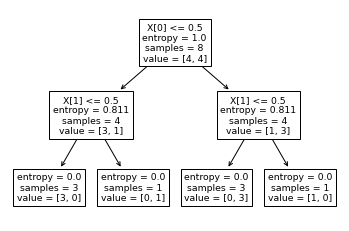

In [7]:
tree.plot_tree(clf)

In [8]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

NameError: name 'sklearn' is not defined

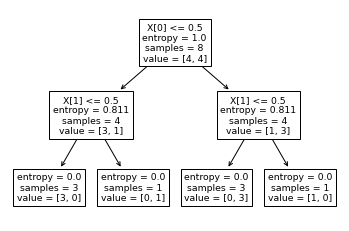

In [9]:
fig = clf.fit(X, y)
tree.plot_tree(fig)
plt.show()

In [10]:
iris_test_data = pd.read_csv('test_iris.csv')
iris_test_data = iris_test_data.drop(['Unnamed: 0'], axis=1)
X_t = iris_test_data.drop(['species'], axis = 1)
y_t = iris_test_data['species']

In [11]:
iris_test_data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.8,2.8,5.1,2.4,2
1,5.9,3.2,4.8,1.8,1
2,6.0,3.0,4.8,1.8,2
3,5.2,2.7,3.9,1.4,1
4,5.1,3.8,1.9,0.4,0


In [12]:
iris_data = pd.read_csv('train_iris.csv')

In [13]:
iris_data = iris_data.drop(['Unnamed: 0'], axis=1)

In [14]:
X = iris_data.drop(['species'], axis = 1)


In [15]:
y = iris_data['species']

In [16]:
score_info = pd.DataFrame()
np.random.seed(0)
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X, y)
    train_score = clf.score(X, y)
    test_score = clf.score(X_t, y_t)
    score_inf = pd.DataFrame({'max_depth': [max_depth], 'train_score' : [train_score], 'test_score' : [test_score]})
    score_info = score_info.append(score_inf)

In [17]:
score_info.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


<AxesSubplot:xlabel='max_depth', ylabel='test_score'>

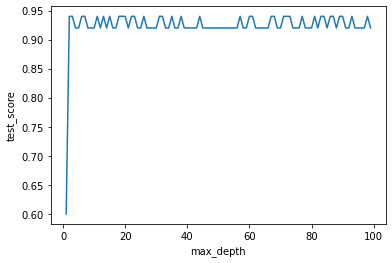

In [18]:
sns.lineplot(x = 'max_depth', y = 'test_score', data = score_info)

In [19]:
cnd = pd.read_csv('dogs_n_cats.csv')

In [20]:
cnd.iloc[546:557]


,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
546,11,4.4,1,0,1,котик
547,7,2.8,1,0,1,котик
548,14,5.6,1,0,1,котик
549,5,2.0,1,0,1,котик
550,14,5.6,0,0,1,котик
551,10,4.0,0,0,1,котик
552,7,2.8,1,0,1,котик
553,12,4.8,0,0,1,котик
554,7,2.8,1,0,1,котик
555,5,2.0,1,0,1,котик


In [21]:
cnd.loc[(cnd['Вид'] == 'котик') & (cnd['Шерстист'] == 1)].count()

Длина                 469
Высота                469
Шерстист              469
Гавкает               469
Лазает по деревьям    469
Вид                   469
dtype: int64

In [22]:
cnd.loc[(cnd['Вид'] == 'котик')].count()

Длина                 500
Высота                500
Шерстист              500
Гавкает               500
Лазает по деревьям    500
Вид                   500
dtype: int64

In [23]:
cnd['Длина'].median()

14.5

In [24]:
X = cnd.drop(['Высота', 'Длина', 'Вид'], axis = 1)

In [25]:
y = cnd['Вид']

In [26]:
score_info = pd.DataFrame()
for max_depth in range(1, 5):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X, y)
    train_score = clf.score(X, y)
    #test_score = clf.score(X_t, y_t)
    score_inf = pd.DataFrame({'max_depth': [max_depth], 'train_score' : [train_score]}) #, 'test_score' : [test_score]}
    score_info = score_info.append(score_inf)


<AxesSubplot:xlabel='max_depth', ylabel='train_score'>

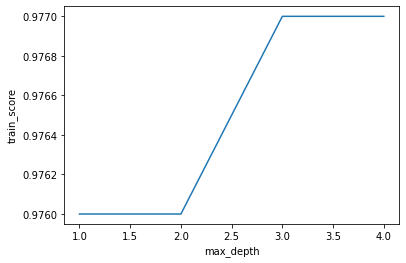

In [27]:
sns.lineplot(x = 'max_depth', y = 'train_score', data = score_info)

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
data_train = pd.read_json('dataset_209691_15.txt')

In [30]:
data_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,18,21.6,1,1,0
1,17,20.4,1,1,0
2,33,39.6,1,1,0
3,15,18.0,1,1,0
4,16,19.2,1,1,0


In [31]:
X_test = data_train.drop(['Высота', 'Длина'], axis = 1)

In [32]:
a = clf.predict(X_test)


In [33]:
list(a).count('собачка')

44

In [34]:
a = 0.33
b = 0.5
c = 2 * a * b/(b+a)

In [35]:
c

0.39759036144578314

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [37]:
songs_data = pd.read_csv('songs.csv')

In [38]:
songs_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens;
0,"the-ownerz,2007,gangstarr,Hip-Hop,""""""One-two.."""";",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"One-two, shots to the chin.. knock you out"""";",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"One-two.."""" """"Devestating!"""" """"On da mic"""";",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"One-two.."""" """"The maker, owner!"""";",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Come on, now come on"""";",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
train_data = pd.read_csv('train_data_tree.csv')

In [40]:
train_data.head(10)
X = train_data.drop(['num'], axis = 1)
y = train_data['num']

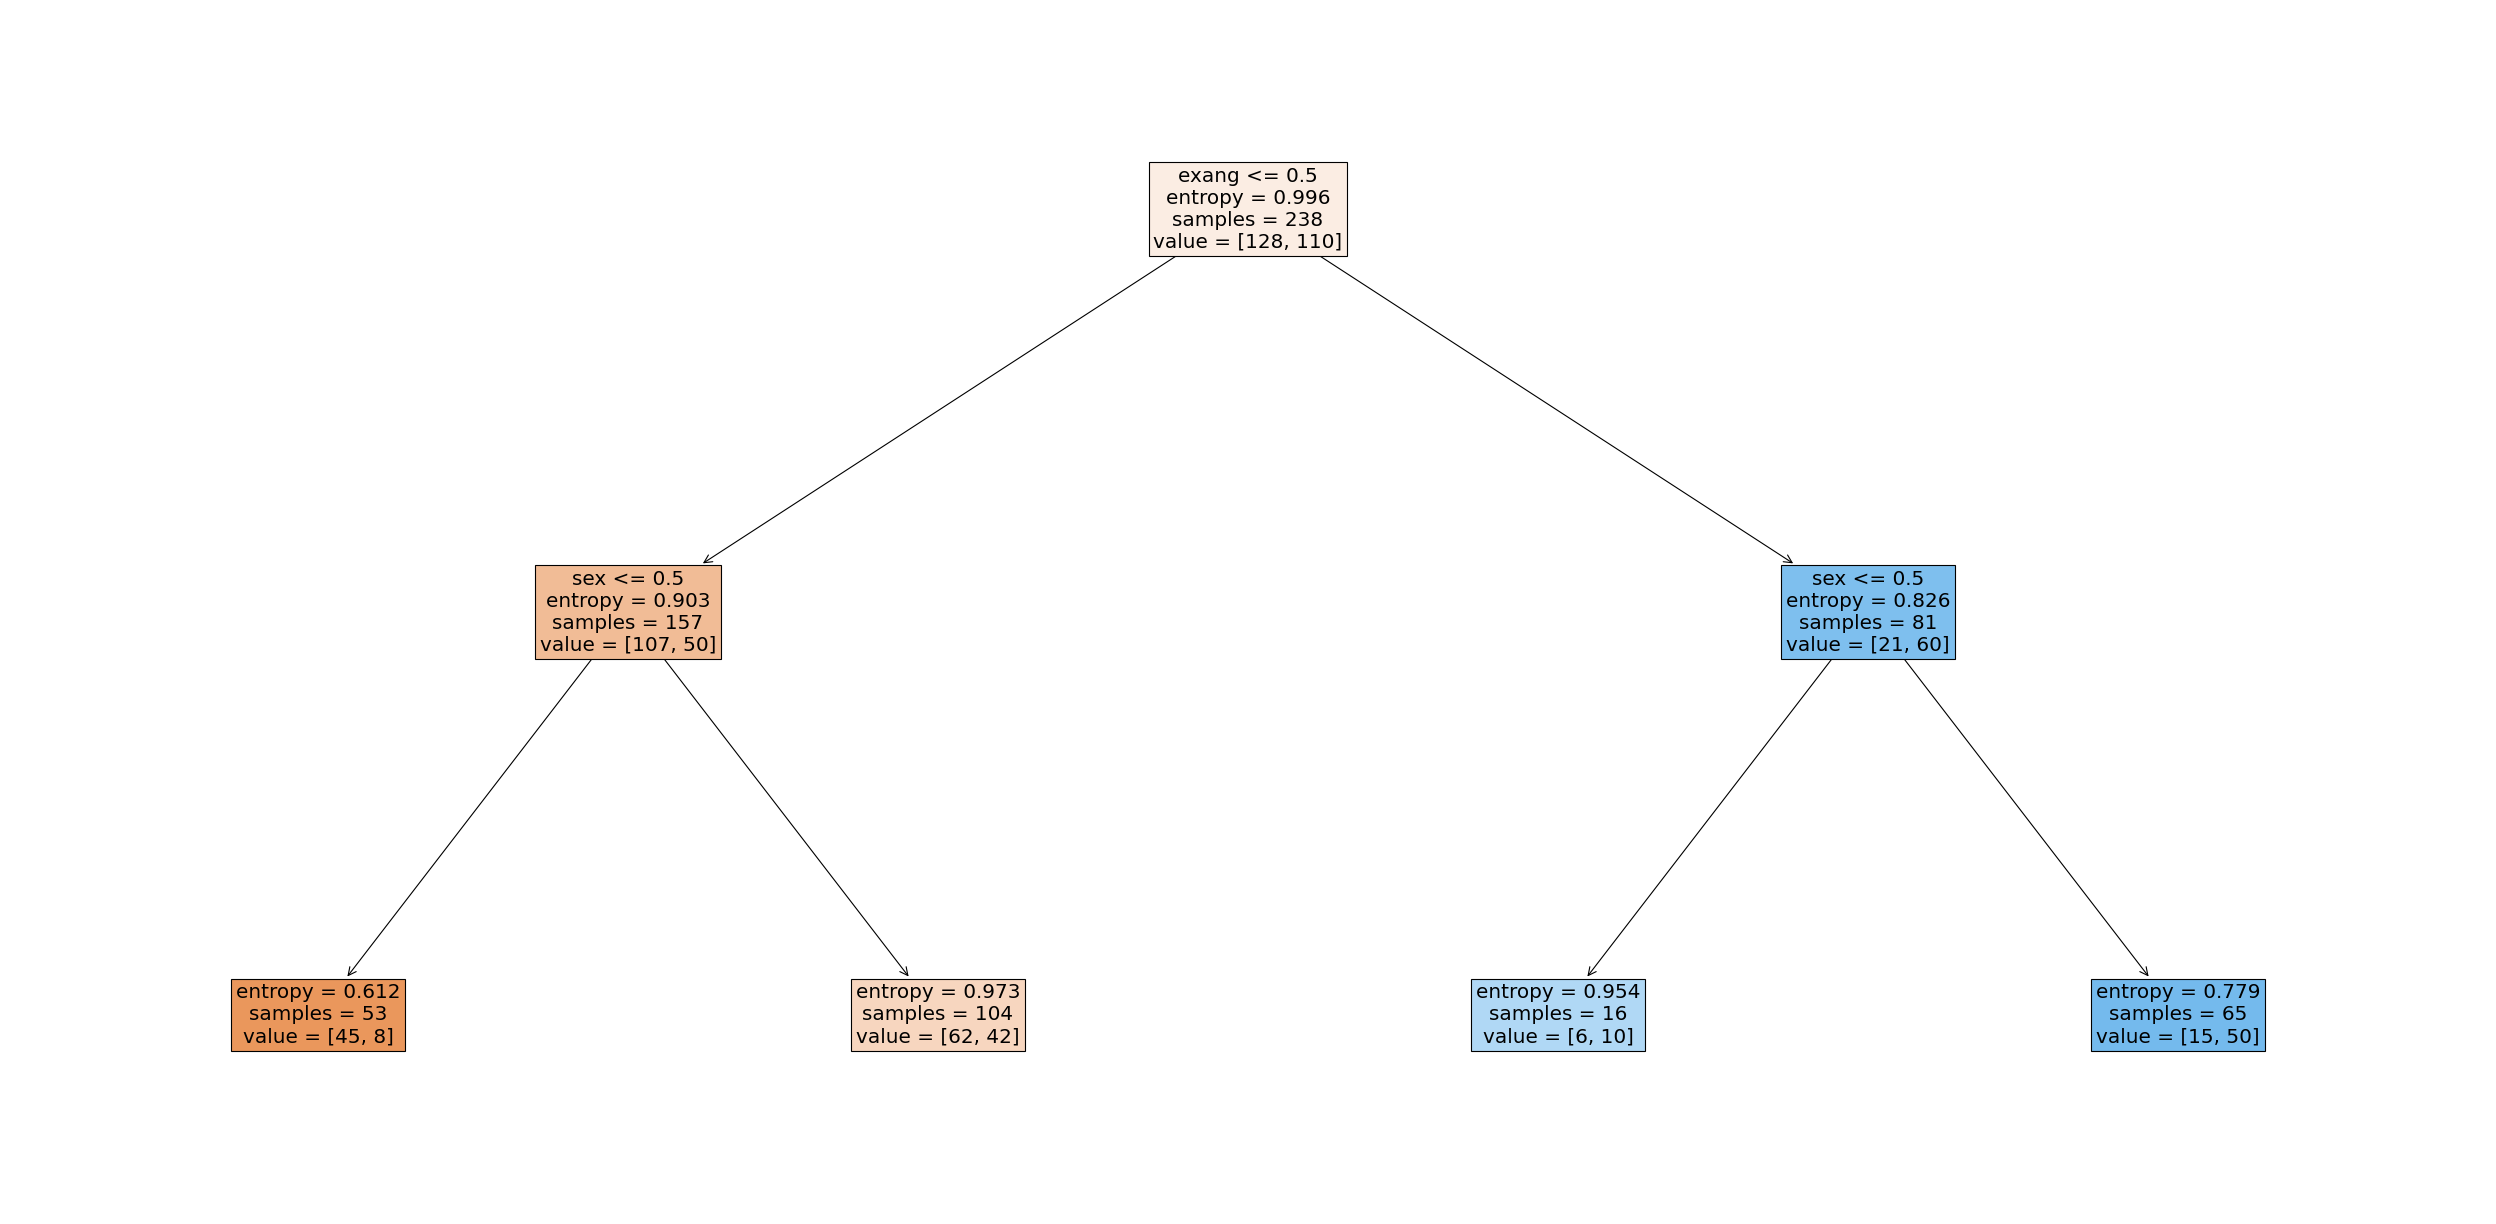

In [41]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)
import seaborn as sb
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=18,filled=True,feature_names=list(X))

In [42]:
l_node = clf.tree_.children_left[4]
n1 = clf.tree_.n_node_samples[l_node]
e1 = clf.tree_.impurity[l_node]

In [43]:
n1, e1


(16, 0.9544340029249649)

In [44]:
r_node = clf.tree_.children_right[0]
n2 = clf.tree_.n_node_samples[r_node]
e2 = clf.tree_.impurity[r_node]

In [45]:
n2, e2

(81, 0.8256265261578954)

In [46]:
IG = 0.996 - (n1*e1 + n2*e2)/N

NameError: name 'N' is not defined

In [47]:
IG

NameError: name 'IG' is not defined

In [48]:
heart_data = pd.read_csv('heart.csv')

In [49]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
x_train = heart_data.drop('target', axis = 1)

y = heart_data['target']
rf.fit(x_train,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

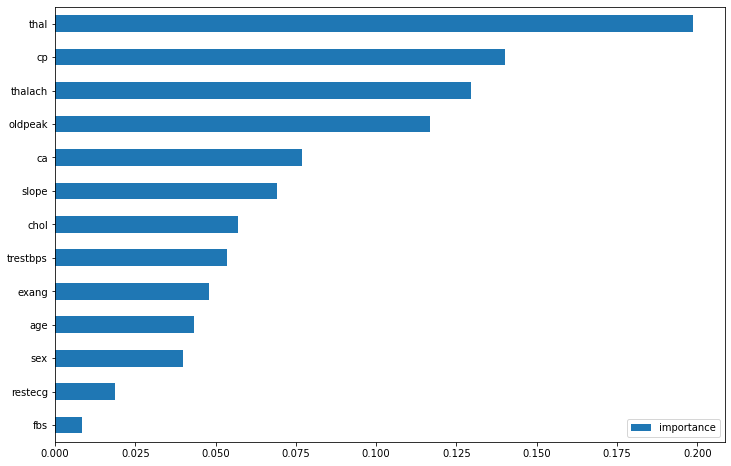

In [51]:

imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [52]:
mush_data = pd.read_csv('training_mush.csv')

In [308]:
mush_data.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
5,3,3,4,0,2,1,0,1,0,1,...,6,6,0,2,1,0,7,4,4,1
6,0,3,8,1,5,1,0,0,8,0,...,7,7,0,2,2,4,5,4,3,1
7,3,3,2,0,8,1,0,1,0,1,...,7,6,0,2,1,0,7,4,4,1
8,5,2,8,0,5,1,1,0,7,1,...,7,7,0,2,1,0,2,3,1,0
9,5,0,3,0,1,1,0,1,2,0,...,7,7,0,2,1,4,3,4,0,1


In [309]:
rf = RandomForestClassifier(random_state = 0)

In [310]:
parametrs = {'n_estimators' : range(10, 50, 10), 'max_depth' : range(1,12,2), 'min_samples_leaf' : range(1,7), 'min_samples_split': range(2,9,2)}
search = GridSearchCV(rf, parametrs, cv = 3, n_jobs=-1)

In [311]:
x = mush_data.drop('class', axis = 1)
y = mush_data['class']

In [316]:
search.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [317]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
mush_data_test = pd.read_csv('testing_mush.csv')

In [ ]:
rf = RandomForestClassifier(n_estimators = 10,max_depth = 9,min_samples_leaf = 1, min_samples_split =2)

In [ ]:
mush_data_test.head(10)

In [ ]:
rf.fit(x,y)

In [ ]:
pred = rf.predict(mush_data_test)

In [ ]:
pred

In [ ]:
list(pred).count(1)

In [ ]:
right_answ = pd.read_csv('testing_y_mush.csv')

In [ ]:
right_answ.head(10)

In [ ]:

sns.heatmap(confusion_matrix(right_answ, pred), annot=True, cmap="Blues")

In [ ]:
invasion_data = pd.read_csv('invasion.csv')


In [ ]:
invasion_data.head(10)

In [ ]:
y = invasion_data['class']
x = invasion_data.drop('class', axis = 1)

In [ ]:
rf = RandomForestClassifier(random_state = 0)

In [ ]:
parametrs = {'n_estimators' : range(10, 30, 5), 'max_depth' : range(1,10), 'min_samples_leaf' : range(1,10), 'min_samples_split': range(2,10)}
search = GridSearchCV(rf, parametrs, cv = 5, n_jobs=-1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
search.best_params_

In [ ]:
rf = RandomForestClassifier(n_estimators = 15, max_depth = 2, min_samples_leaf = 1, min_samples_split = 2, random_state = 0)
rf.fit(x,y)

In [ ]:
oper_data = pd.read_csv('operative_information.csv')

In [ ]:
pred = rf.predict(oper_data)


In [ ]:
list(pred).count('fighter')



In [ ]:
list(pred).count('transport')

In [ ]:

list(pred).count('cruiser')

In [ ]:
imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
space_data = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [ ]:
space_data.shape

In [ ]:
x = space_data.drop('dangerous', axis = 1)
y = space_data['dangerous']

In [ ]:
rf = RandomForestClassifier(random_state = 0)
parametrs = {'n_estimators' : range(10, 50, 10), 'max_depth' : range(1,16,2), 'min_samples_leaf' : range(1,7), 'min_samples_split': range(2,7)}

In [ ]:
search = RandomizedSearchCV(rf, parametrs, cv = 5)

In [ ]:
search.fit(x,y)

In [ ]:
search.best_params_

In [ ]:

sns.heatmap(space_data.corr(), annot=True, cmap="Blues")

In [ ]:
rf = RandomForestClassifier(n_estimators= 40,
 min_samples_split= 5,
 min_samples_leaf= 3,
 max_depth= 3)
rf.fit(x,y)
imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
from time import time
before = time()
speed.apply(np.mean)
after = time()
print(after - before)

In [ ]:
speed = invasion_data['speed']

In [ ]:
speed.head()

In [ ]:
0.0005011558532714844 mean(axis=0)
0.00047469139099121094 apply('mean')
0.0025260448455810547 apply(np.mean)
0.002005338668823242 describe().loc['mean']


In [1]:
site_data = pd.read_csv('titanic.csv')

NameError: name 'pd' is not defined

In [4]:
events_data = pd.read_csv('events_data_test.csv')

In [9]:
events_data

,step_id,timestamp,action,user_id,date
0,30456,1526893787,viewed,24417,2018-05-21 09:09:47
1,30456,1526893797,viewed,24417,2018-05-21 09:09:57
2,30456,1526893954,viewed,24417,2018-05-21 09:12:34
3,30456,1526895780,viewed,24417,2018-05-21 09:43:00
4,30456,1526893787,discovered,24417,2018-05-21 09:09:47
...,...,...,...,...,...
274763,158433,1545846175,discovered,3649,2018-12-26 17:42:55
274764,158433,1545846175,passed,3649,2018-12-26 17:42:55
274765,158433,1545846283,viewed,20953,2018-12-26 17:44:43
274766,158433,1545846283,discovered,20953,2018-12-26 17:44:43


In [5]:
sub_data = pd.read_csv('submission_data_test.csv')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
sub_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [8]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,30456,1526893787,viewed,24417,2018-05-21 09:09:47
1,30456,1526893797,viewed,24417,2018-05-21 09:09:57
2,30456,1526893954,viewed,24417,2018-05-21 09:12:34
3,30456,1526895780,viewed,24417,2018-05-21 09:43:00
4,30456,1526893787,discovered,24417,2018-05-21 09:09:47


In [6]:
sub_data['date'].max()

Timestamp('2018-08-11 13:02:01')

In [12]:
events_data.head(10)
events_data['action'].unique()

array(['viewed', 'discovered', 'passed', 'started_attempt'], dtype=object)

In [13]:
sub_data.head(10)

,step_id,timestamp,submission_status,user_id,date
0,31971,1526800961,wrong,24370,2018-05-21 09:09:47
1,31971,1526800976,wrong,24370,2018-05-21 09:09:57
2,31971,1526800993,wrong,24370,2018-05-21 09:12:34
3,31971,1526801054,correct,24370,2018-05-21 09:43:00
4,31972,1526800664,wrong,24370,2018-05-21 09:09:47
5,31972,1526800788,wrong,24370,2018-05-21 09:09:47
6,31972,1526800809,correct,24370,2018-05-21 09:27:47
7,31976,1526800371,wrong,24370,2018-05-21 09:28:06
8,31976,1526800399,wrong,24370,2018-05-21 09:39:35
9,31976,1526800408,correct,24370,2018-05-21 10:03:50


In [63]:
sub_data['submission_status'] = pd.get_dummies(sub_data['submission_status'])
sub_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1526800961,1,24370,2018-05-21 09:09:47
1,31971,1526800976,1,24370,2018-05-21 09:09:57
2,31971,1526800993,1,24370,2018-05-21 09:12:34
3,31971,1526801054,0,24370,2018-05-21 09:43:00
4,31972,1526800664,1,24370,2018-05-21 09:09:47


In [15]:
events_data2 = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [16]:
events_data2.head(10)

action,user_id,discovered,passed,started_attempt,viewed
0,4,1,1,0,1
1,6,1,1,0,1
2,10,2,2,0,6
3,12,11,9,4,14
4,13,70,70,35,105
5,15,1,1,0,1
6,19,1,1,0,1
7,21,74,68,70,98
8,23,1,1,0,1
9,35,34,30,11,70


In [17]:
events_data2.groupby(['passed']).user_id.nunique().head()

passed
0     633
1    2413
2     278
3     118
4     167
Name: user_id, dtype: int64

In [98]:
new_data = events_data2[['user_id', 'passed']].rename(columns = {'passed': 'number_passed'})

In [99]:
new_data.head(10)

action,user_id,number_passed
0,4,1
1,6,1
2,10,2
3,12,9
4,13,70
5,15,1
6,19,1
7,21,68
8,23,1
9,35,30


In [100]:
wrong_sub = sub_data[sub_data.submission_status == 0].groupby('user_id').agg({'submission_status': 'count'}).rename(columns = {'submission_status': 'wrong_subs'})

In [101]:
wrong_sub = wrong_sub.reset_index()

In [102]:
new_data = pd.merge(new_data, wrong_sub, how = 'outer').fillna(0)

In [104]:
right_sub = sub_data[sub_data.submission_status == 1].groupby('user_id').agg({'submission_status': 'count'}).rename(columns = {'submission_status': 'right_sub'})

In [93]:
right_sub = right_sub.reset_index()

In [106]:
right_sub = right_sub.reset_index()

In [107]:
right_sub.head()

,user_id,right_sub
0,13,36
1,15,30
2,21,103
3,35,35
4,55,3


In [108]:
new_data = pd.merge(new_data, right_sub, how = 'outer').fillna(0)

In [109]:
new_data.head(10)

,user_id,number_passed,wrong_subs,right_sub
0,4,1,0.0,0.0
1,6,1,0.0,0.0
2,10,2,0.0,0.0
3,12,9,1.0,0.0
4,13,70,29.0,36.0
5,15,1,10.0,30.0
6,19,1,0.0,0.0
7,21,68,24.0,103.0
8,23,1,0.0,0.0
9,35,30,7.0,35.0


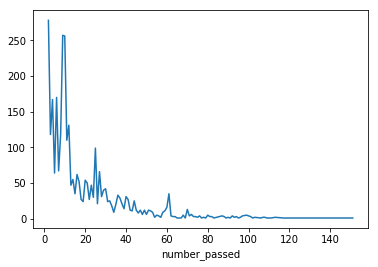

In [53]:
new_data[new_data['number_passed'] > 1].groupby('number_passed').user_id.nunique().plot()

In [110]:
new_data[new_data['number_passed'] > 1].groupby('number_passed').user_id.nunique().quantile(0.8)

39.00000000000006

In [111]:
new_data[new_data['number_passed'] > 9].user_id.nunique()

1898

In [114]:
made_smth = new_data[new_data['number_passed'] > 0]

In [115]:
made_smth.head()

,user_id,number_passed,wrong_subs,right_sub
0,4,1,0.0,0.0
1,6,1,0.0,0.0
2,10,2,0.0,0.0
3,12,9,1.0,0.0
4,13,70,29.0,36.0


In [116]:
a = made_smth.groupby('number_passed').right_sub.mean()
a = a.to_frame().reset_index()
a.head()

,number_passed,right_sub
0,1,0.789474
1,2,1.104317
2,3,1.601695
3,4,1.011976
4,5,1.343750


In [117]:
b = made_smth.groupby('number_passed').wrong_subs.mean()
b = b.to_frame().reset_index()
b.head()

,number_passed,wrong_subs
0,1,0.917116
1,2,1.262590
2,3,1.533898
3,4,1.047904
4,5,1.734375


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


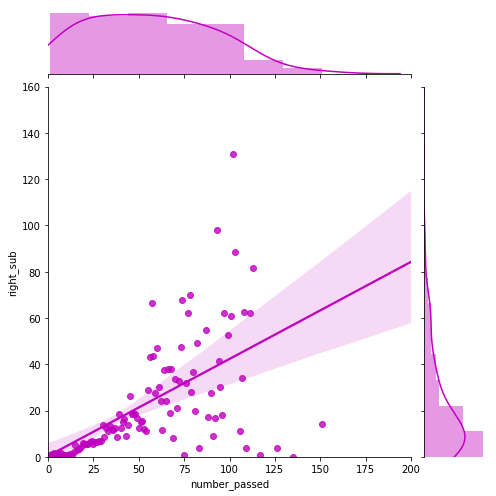

In [119]:
import seaborn as sns

g = sns.jointplot(x="number_passed", y="right_sub", data=a,
                  kind="reg", truncate=False,
                  xlim=(0, 200), ylim=(0, 160),
                  color="m", height=7)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


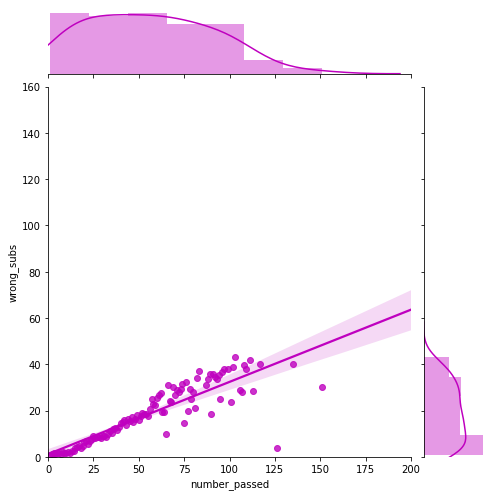

In [120]:
g = sns.jointplot(x="number_passed", y="wrong_subs", data=b,
                  kind="reg", truncate=False,
                  xlim=(0, 200), ylim=(0, 160),
                  color="m", height=7)

In [121]:
new_data['right_coff'] = new_data['right_sub'] / new_data['wrong_subs']

In [122]:
new_data = new_data.fillna(0)

In [123]:
new_data.head()



,user_id,number_passed,wrong_subs,right_sub,right_coff
0,4,1,0.0,0.0,0.000000
1,6,1,0.0,0.0,0.000000
2,10,2,0.0,0.0,0.000000
3,12,9,1.0,0.0,0.000000
4,13,70,29.0,36.0,1.241379


In [124]:
new_data_coff = new_data[new_data['right_coff'] > 0]

In [125]:
new_data_coff.head()

,user_id,number_passed,wrong_subs,right_sub,right_coff
4,13,70,29.0,36.0,1.241379
5,15,1,10.0,30.0,3.000000
7,21,68,24.0,103.0,4.291667
9,35,30,7.0,35.0,5.000000
12,55,23,8.0,3.0,0.375000


In [126]:
new_data_coff[new_data_coff['right_coff'] > 1].user_id.count()

627

In [127]:
new_data_coff.user_id.count()

1759

In [39]:
627/1759

0.3564525298465037

In [40]:
new_data[new_data['number_passed'] <= 1].user_id.count()

3046

In [41]:
new_data.user_id.count()

6184

In [42]:
did_smth = new_data[new_data['number_passed'] > 1]

In [43]:
did_smth.user_id.count()

3138

In [48]:
new_data.head()

,user_id,number_passed,wrong_subs
0,4,1,0.0
1,6,1,0.0
2,10,2,0.0
3,12,9,0.0
4,13,70,36.0


In [45]:
6184 - 3046

3138

In [206]:
events_data0 = pd.read_csv('event_data_train.csv')

In [207]:
sub_data0 = pd.read_csv('submissions_data_train.csv')

In [208]:
events_data0['date'] = pd.to_datetime(events_data0.timestamp, unit='s')
sub_data0['date'] = pd.to_datetime(events_data0.timestamp, unit='s')
sub_data0['submission_status'] = pd.get_dummies(sub_data0['submission_status'])

In [166]:
sub_data0.head(10)

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,0.0,15853,2018-05-21 09:09:47
1,31972,1434348300,0.0,15853,2018-05-21 09:09:57
2,31972,1478852149,0.0,15853,2018-05-21 09:12:34
3,31972,1478852164,1.0,15853,2018-05-21 09:43:00
4,31976,1434348123,0.0,15853,2018-05-21 09:09:47
5,31976,1434348188,0.0,15853,2018-05-21 09:09:47
6,31976,1478852055,1.0,15853,2018-05-21 09:27:47
7,31977,1434347371,0.0,15853,2018-05-21 09:28:06
8,31978,1434349981,0.0,15853,2018-05-21 09:39:35
9,31979,1434446091,1.0,15853,2018-05-21 10:03:50


In [209]:
sub_data0['day'] = sub_data0.date.dt.date

In [222]:
events_data0['day'] = events_data0.date.dt.date

In [169]:
events_data0.head(10)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2018-05-21 09:09:47,2018-05-21
1,32815,1434340848,passed,17632,2018-05-21 09:09:57,2018-05-21
2,32815,1434340848,discovered,17632,2018-05-21 09:12:34,2018-05-21
3,32811,1434340895,discovered,17632,2018-05-21 09:43:00,2018-05-21
4,32811,1434340895,viewed,17632,2018-05-21 09:09:47,2018-05-21
5,32811,1434340895,passed,17632,2018-05-21 09:09:47,2018-05-21
6,32929,1434340921,discovered,17632,2018-05-21 09:27:47,2018-05-21
7,32929,1434340921,viewed,17632,2018-05-21 09:28:06,2018-05-21
8,32929,1434340939,started_attempt,17632,2018-05-21 09:39:35,2018-05-21
9,32929,1434340944,passed,17632,2018-05-21 10:03:50,2018-05-21


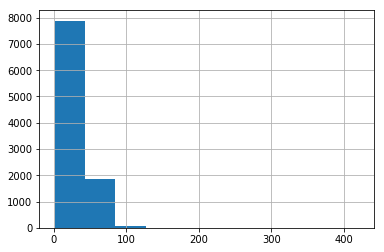

In [211]:
sub_data0[sub_data0['submission_status'] == 1].groupby(['user_id']).step_id.count().hist()

In [212]:
events1 =events_data0.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [213]:
events1.head(10)

action,user_id,discovered,passed,started_attempt,viewed
0,3,91,87,30,192
1,14,4,3,1,9
2,16,140,135,70,298
3,18,3,2,0,3
4,20,10,8,0,13
5,28,1,1,0,2
6,33,4,3,1,4
7,38,1,0,0,1
8,39,77,68,29,203
9,42,1,1,0,1


In [214]:
made_smth = sub_data0[sub_data0.submission_status == 1].groupby('user_id').agg({'submission_status': 'count'}).rename(columns = {'submission_status': 'right_subs'})

In [216]:
made_smth = made_smth.reset_index()
made_smth.head(15)

,user_id,right_subs
0,2,2
1,3,29
2,5,2
3,8,9
4,16,77
5,22,76
6,25,1
7,26,7
8,30,119
9,31,4


In [172]:
sub_data0.user_id.nunique()

9940

In [218]:
sub_data0 = sub_data0.sort_values(by = 'user_id')

In [219]:
events_data0 = events_data0.sort_values(by = 'user_id')

In [261]:
sub_data0.head(10)

,step_id,timestamp,submission_status,user_id,date,day
506854,32929,1514383420,1,2,2015-07-11 11:02:39,2015-07-11
506853,32812,1514383485,1,2,2015-07-11 11:02:39,2015-07-11
114959,33351,1444566227,1,3,2015-06-20 22:59:58,2015-06-20
114943,32175,1441446255,0,3,2015-06-20 22:54:31,2015-06-20
114944,32175,1441446271,1,3,2015-06-20 22:54:31,2015-06-20
114945,32198,1441452492,0,3,2015-06-20 22:55:14,2015-06-20
114946,32198,1441452500,1,3,2015-06-20 22:55:14,2015-06-20
114947,32202,1441456324,0,3,2015-06-20 22:55:45,2015-06-20
114948,32202,1441459801,0,3,2015-06-20 22:56:28,2015-06-20
114949,32202,1441472187,1,3,2015-06-20 22:56:38,2015-06-20


In [223]:
events_data0.head(10)

,step_id,timestamp,action,user_id,date,day
705854,31991,1441440215,viewed,3,2015-09-05 08:03:35,2015-09-05
741177,33540,1444568491,started_attempt,3,2015-10-11 13:01:31,2015-10-11
741179,33540,1444568820,passed,3,2015-10-11 13:07:00,2015-10-11
741259,33538,1444573095,viewed,3,2015-10-11 14:18:15,2015-10-11
741260,33538,1444573095,discovered,3,2015-10-11 14:18:15,2015-10-11
741261,33540,1444573097,viewed,3,2015-10-11 14:18:17,2015-10-11
741269,33538,1444573495,viewed,3,2015-10-11 14:24:55,2015-10-11
741270,33371,1444573515,viewed,3,2015-10-11 14:25:15,2015-10-11
741271,33372,1444573533,viewed,3,2015-10-11 14:25:33,2015-10-11
741272,33376,1444573552,viewed,3,2015-10-11 14:25:52,2015-10-11


In [225]:
made_smth = sub_data0[sub_data0.submission_status == 1].groupby('user_id').agg({'submission_status': 'count'}).rename(columns = {'submission_status': 'right_subs'})

In [226]:
made_smth = made_smth.reset_index()
made_smth.head(15)

,user_id,right_subs
0,2,2
1,3,29
2,5,2
3,8,9
4,16,77
5,22,76
6,25,1
7,26,7
8,30,119
9,31,4


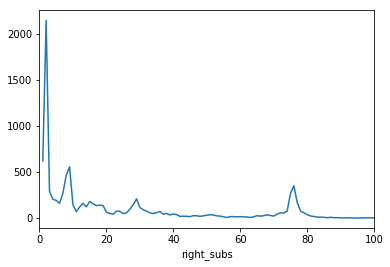

In [235]:
made_smth.groupby('right_subs').user_id.count().plot(xlim = (0,100))

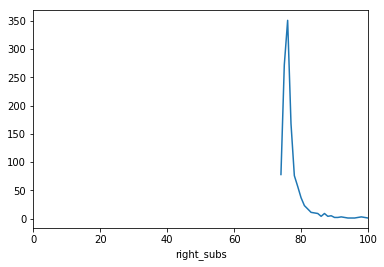

In [241]:
made_smth[made_smth['right_subs'] > 73].groupby('right_subs').user_id.count().plot(xlim = (0,100))

In [281]:
made_smth[made_smth['right_subs'] > 70].user_id.count()

1325

In [282]:
passed_course = made_smth[made_smth['right_subs'] > 73]
passed_course = passed_course.reset_index().drop(['index'], axis = 1)
passed_course.head(10)

,user_id,right_subs
0,16,77
1,22,76
2,30,119
3,34,77
4,39,77
5,60,76
6,66,76
7,80,76
8,87,76
9,149,77


In [283]:
passed_course['passed'] = 0
passed_course = passed_course.drop(['right_subs'], axis = 1)
passed_course.head(10)

,user_id,passed
0,16,0
1,22,0
2,30,0
3,34,0
4,39,0
5,60,0
6,66,0
7,80,0
8,87,0
9,149,0


In [284]:
final_data = pd.merge(sub_data0, passed_course, how = 'outer')

In [288]:
final_data.passed = final_data.passed.fillna(1)

In [289]:
final_data.passed = pd.get_dummies(final_data.passed)

In [291]:
final_data.head(10)

,step_id,timestamp,submission_status,user_id,date,day,passed
0,32929,1514383420,1,2,2015-07-11 11:02:39,2015-07-11,0
1,32812,1514383485,1,2,2015-07-11 11:02:39,2015-07-11,0
2,33351,1444566227,1,3,2015-06-20 22:59:58,2015-06-20,0
3,32175,1441446255,0,3,2015-06-20 22:54:31,2015-06-20,0
4,32175,1441446271,1,3,2015-06-20 22:54:31,2015-06-20,0
5,32198,1441452492,0,3,2015-06-20 22:55:14,2015-06-20,0
6,32198,1441452500,1,3,2015-06-20 22:55:14,2015-06-20,0
7,32202,1441456324,0,3,2015-06-20 22:55:45,2015-06-20,0
8,32202,1441459801,0,3,2015-06-20 22:56:28,2015-06-20,0
9,32202,1441472187,1,3,2015-06-20 22:56:38,2015-06-20,0


In [300]:
new_data1 = events1[['user_id', 'passed']].rename(columns = {'passed': 'number_passed'})

In [301]:
wrong_sub1 = sub_data0[sub_data0.submission_status == 0].groupby('user_id').agg({'submission_status': 'count'}).rename(columns = {'submission_status': 'wrong_subs'})
wrong_sub1 = wrong_sub1.reset_index()
new_data1 = pd.merge(new_data1, wrong_sub1, how = 'outer').fillna(0)
right_sub1 = sub_data0[sub_data0.submission_status == 1].groupby('user_id').agg({'submission_status': 'count'}).rename(columns = {'submission_status': 'right_subs'})
right_sub1 = right_sub1.reset_index()
new_data1 = pd.merge(new_data1, right_sub1, how = 'outer').fillna(0)
new_data1.head(10)

,user_id,number_passed,wrong_subs,right_subs
0,3,87.0,23.0,29.0
1,14,3.0,1.0,0.0
2,16,135.0,106.0,77.0
3,18,2.0,0.0,0.0
4,20,8.0,0.0,0.0
5,28,1.0,0.0,0.0
6,33,3.0,0.0,0.0
7,38,0.0,0.0,0.0
8,39,68.0,29.0,77.0
9,42,1.0,0.0,0.0
